

<a href='https://erdogant.medium.com/membership' target='_blank'><img height='200' style='border:0px;height:36px;' src='https://erdogant.github.io/clusteval/pages/html/_images/logo_large_3.png' border='0' alt='Follow me on Medium' /></a>


Welcome to the notebook of **clusteval**. Clusteval is a Python package for **unsupervised cluster evaluation**. Three well known methods are implemented that can be used to measure the goodness of the clustering approach; *silhouette*, *dbindex*, and *derivative*. The evaluation approaches can be applied on the most commonly used clustering approaches; *agglomerative*, *kmeans*, *dbscan* and *hdbscan*. There is no golden rule to define the optimal number of clusters. It requires investigation, and backtesting. 

There are a couple of common methods that can help you: 
<br>
<b>* Silhouette-score</b>
<br>
<b>* Inconsistency method</b>
<br>
<b>* Davies-Bouldin index</b>
<br>



---

## Read the Medium blog for more detailed information.

#### [1. A step-by-step guide for clustering images](https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128)

#### [2. Detection of Duplicate Images Using Image Hash Functions](https://towardsdatascience.com/detection-of-duplicate-images-using-image-hash-functions-4d9c53f04a75)

#### [3. From Data to Clusters: When is Your Clustering Good Enough?](https://towardsdatascience.com/from-data-to-clusters-when-is-your-clustering-good-enough-5895440a978a)

#### [4. From Clusters To Insights; The Next Step](https://towardsdatascience.com/from-clusters-to-insights-the-next-step-1c166814e0c6)


---

## Github
* [Github](https://github.com/erdogant/clusteval)
* [Documentation pages](https://erdogant.github.io/clusteval/)

---

## Support
This library runs on coffee :) You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/pca/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/pca).

<a href='https://www.buymeacoffee.com/erdogant' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=3' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a>
<a href='https://erdogant.medium.com/membership' target='_blank'><img height='50' style='border:0px;height:36px;' src='https://erdogant.github.io/images/medium_follow_me.jpg' border='0' alt='Follow me on Medium' /></a>

---



**Installation of libraries**

In [ ]:
!pip install -U scatterd
!pip install -U clusteval

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=6689e2101bc4dde1bf2f4ea7b1fafe377dc6f09c32d6f08eebbb558156ab0c63
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
# Libraries
import sys, os
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs, make_circles
from scipy.cluster.hierarchy import inconsistent

import numpy as np
import matplotlib.pyplot as plt

from clusteval import clusteval
from scatterd import scatterd


### Cluster evaluation

Evaluate the goodness of clusters based on the different evaluation approaches. Below are four examples to create messy dataset.  

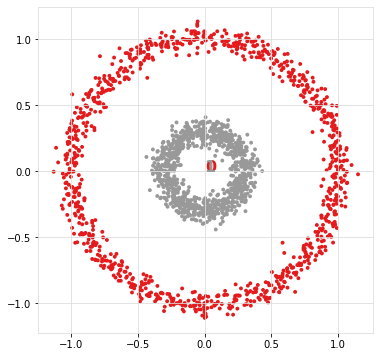

In [ ]:
X1,y1 = make_circles(n_samples=2000, factor=0.3, noise=0.05, random_state=4)
scatterd(X1[:,0],X1[:,1],label=y1, figsize=(6,6));

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7c17f090>)

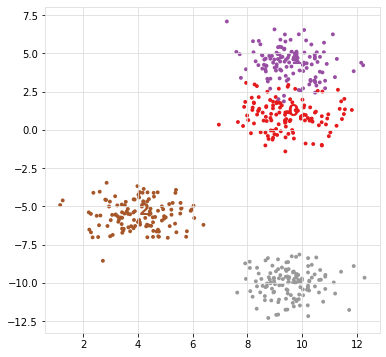

In [ ]:
X2,y2 = make_blobs(n_samples=500, n_features=2, centers=4, random_state=4)
scatterd(X2[:,0],X2[:,1],label=y2, figsize=(6,6))

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7c4c7550>)

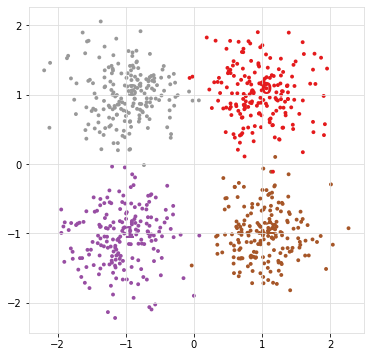

In [ ]:
X3, y3 = make_blobs(n_samples=750, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.4,random_state=0)
scatterd(X3[:,0],X3[:,1],label=y3, figsize=(6,6))

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e76978e50>)

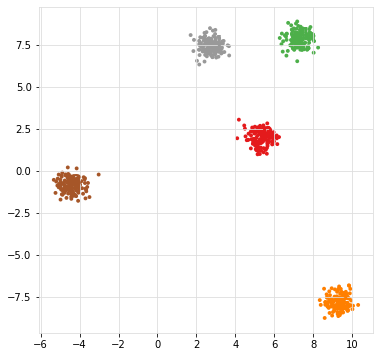

In [ ]:
X4,y4 = make_blobs(n_samples=750, centers=5, n_features=2, cluster_std=0.4)
scatterd(X4[:,0],X4[:,1],label=y4, figsize=(6,6))

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7cced050>)

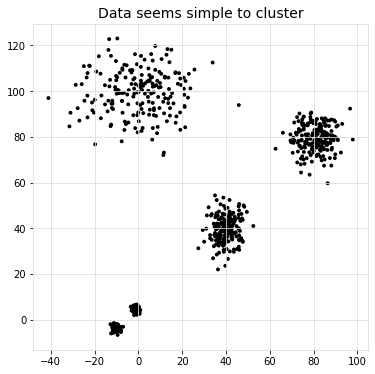

In [ ]:
# Make blobs with variances being extremely different
Xs, _ = make_blobs(n_samples=200, n_features=2, centers=2, random_state=1)
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[200, 1], [1, 100]], size=[200,])
X5 = np.concatenate((Xs, c, d, e),)
scatterd(X5[:,0], X5[:,1], figsize=(6, 6), title='Data seems simple to cluster')


[clusteval] >Evaluate using dbindex.


100%|██████████| 23/23 [00:00<00:00, 148.27it/s]


[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 175.49it/s]


[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 6
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|██████████| 245/245 [00:28<00:00,  8.73it/s]


<Figure size 432x288 with 0 Axes>

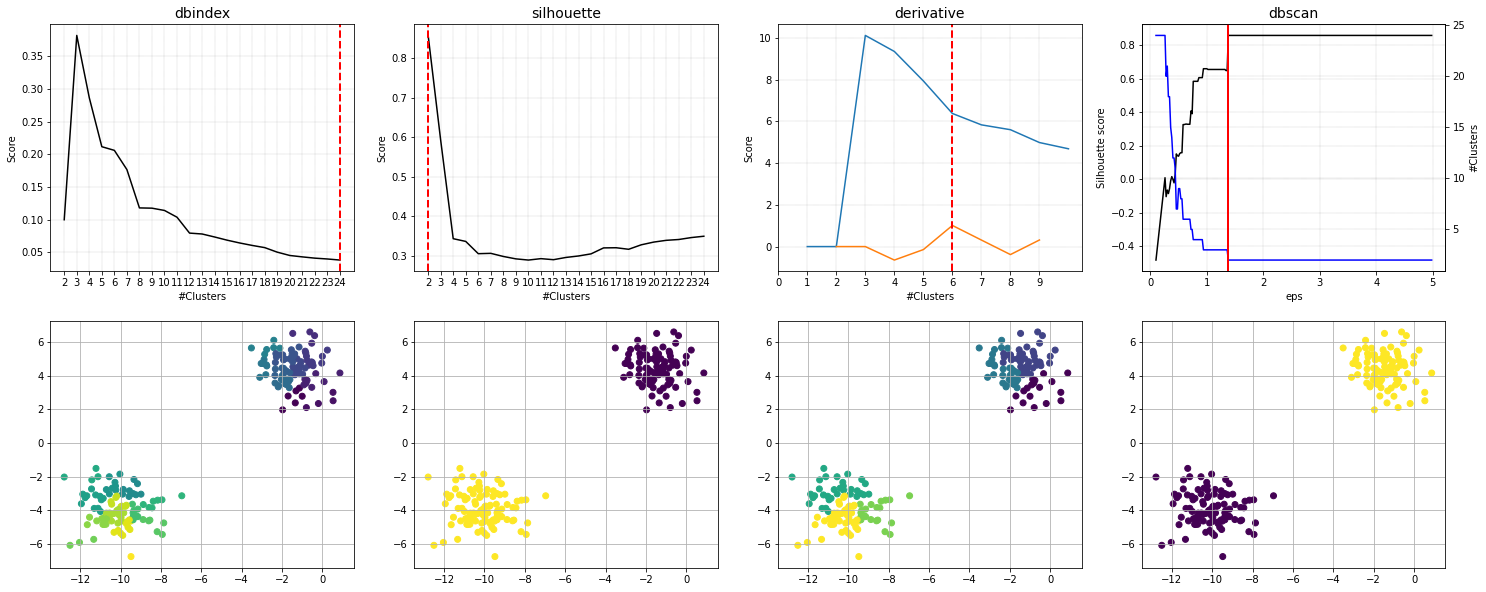

In [ ]:
import clusteval as ce

X = X1

plt.figure()
fig, axs = plt.subplots(2,4, figsize=(25,10))

# dbindex
results = ce.dbindex.fit(X)
_ = ce.dbindex.plot(results, title='dbindex', ax=axs[0][0], visible=False)
axs[1][0].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][0].grid(True)

# silhouette
results = ce.silhouette.fit(X)
_ = ce.silhouette.plot(results,title='silhouette', ax=axs[0][1], visible=False)
axs[1][1].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][1].grid(True)

# derivative
results = ce.derivative.fit(X)
_ = ce.derivative.plot(results,title='derivative', ax=axs[0][2], visible=False)
axs[1][2].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][2].grid(True)

# dbscan
results = ce.dbscan.fit(X)
_ = ce.dbscan.plot(results,title='dbscan', ax=axs[0][3], visible=False)
axs[1][3].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][3].grid(True)

plt.show()

In [ ]:

# Cluster
Z=linkage(X, method='ward', metric='euclidean')

depth = 5
incons = inconsistent(Z, depth)

#The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5
#Note that the inconsistency values heavily depend on the depth of the tree you calculate the averages over!
incons[-10:]


array([[ 0.85186046,  1.02756479, 28.        ,  4.09819801],
       [ 1.31269064,  1.33740713, 30.        ,  3.02960375],
       [ 0.95150598,  1.11458241, 30.        ,  4.02246963],
       [ 1.27875311,  1.37003542, 28.        ,  3.13461952],
       [ 0.87295512,  1.10375267, 31.        ,  4.26544137],
       [ 1.43067345,  1.38625174, 30.        ,  3.16700071],
       [ 1.37022723,  1.43146416, 31.        ,  3.53564721],
       [ 2.95784943,  4.67997263, 31.        ,  5.10062239],
       [ 2.91793505,  5.0064487 , 31.        ,  5.10653765],
       [ 5.96338182,  8.83746664, 31.        ,  3.78445263]])


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 4
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


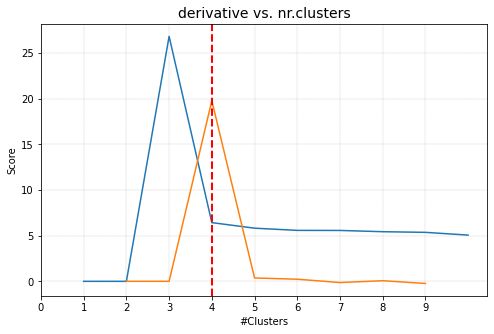

In [ ]:
# Cluster evaluation with the elbow method
cl = clusteval(evaluate='derivative', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
ax = cl.plot(figsize=(8,5))


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 41.45it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [4].
[clusteval] >Fin.


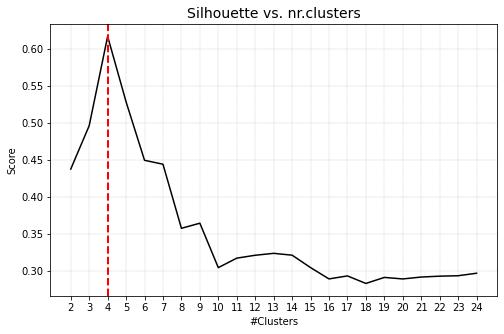

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7f2ff750>)

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(evaluate='silhouette', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
cl.plot(figsize=(8,5))


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 23/23 [00:00<00:00, 67.53it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


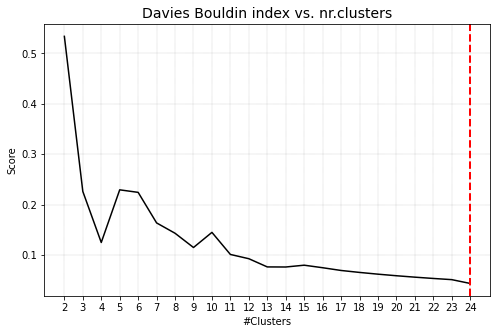

[clusteval] >Estimated number of n_clusters: 24, average silhouette_score=0.297


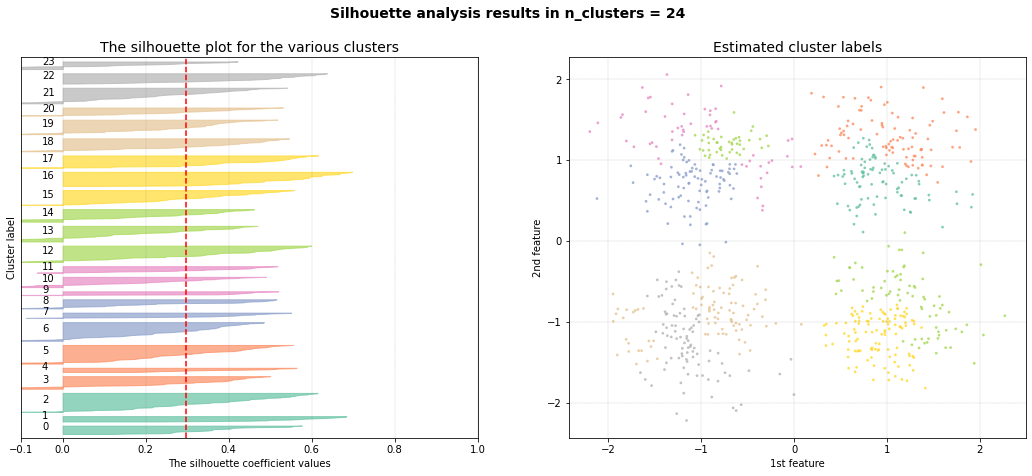

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(evaluate='dbindex', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
cl.plot(figsize=(8,5))
cl.scatter(X)


[clusteval] >Fit using dbscan with metric: euclidean, and linkage: ward
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|██████████| 245/245 [00:27<00:00,  8.76it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


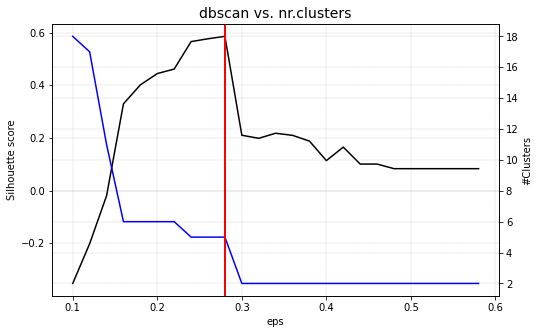

[clusteval] >Estimated number of n_clusters: 4, average silhouette_score=0.586


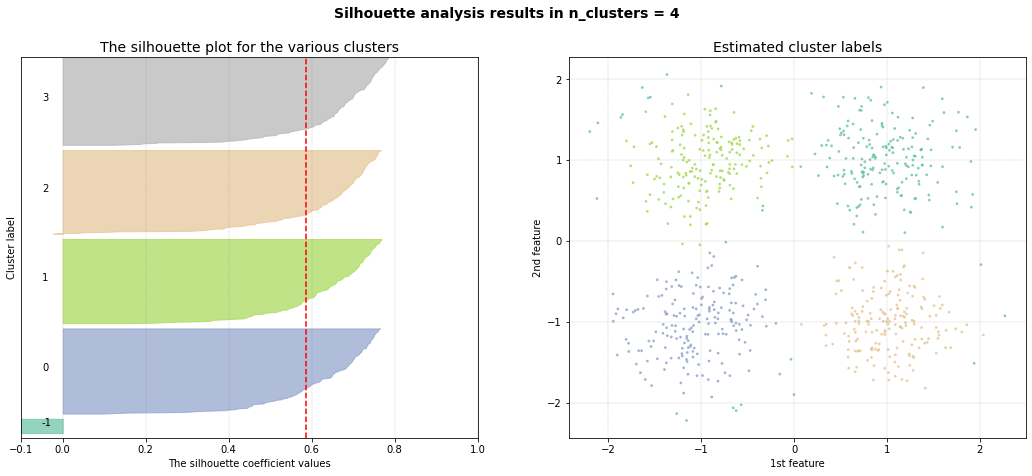

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(cluster='dbscan', evaluate='silhouette', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
cl.plot(figsize=(8,5))
cl.scatter(X)
#plt.scatter(X[:,0], X[:,1])


[clusteval] >Estimated number of n_clusters: 4, average silhouette_score=0.586


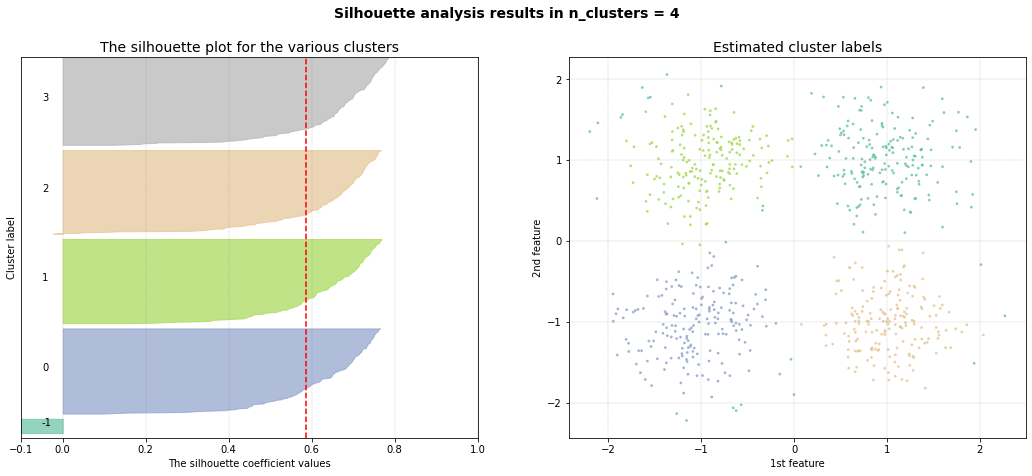

In [ ]:
cl.scatter(X)

### Clusters with different densities
Evaluate the optimal number of clusters when there is <b>very</b> different variances in the different clusters:

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7aea9510>)

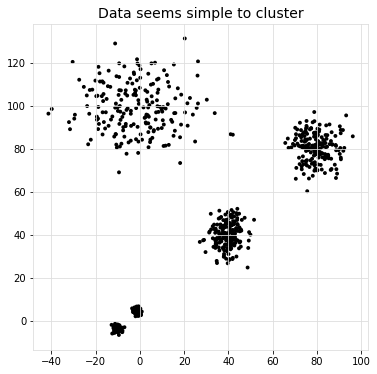

In [ ]:
# Make blobs with variances being extremely different
X, labx = make_blobs(n_samples=200, n_features=2, centers=2, random_state=1)
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[200, 1], [1, 100]], size=[200,])
X2 = np.concatenate((X, c, d, e),)
scatterd(X2[:,0], X2[:,1], figsize=(6, 6), title='Data seems simple to cluster')


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 4
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [4].
[clusteval] >Fin.


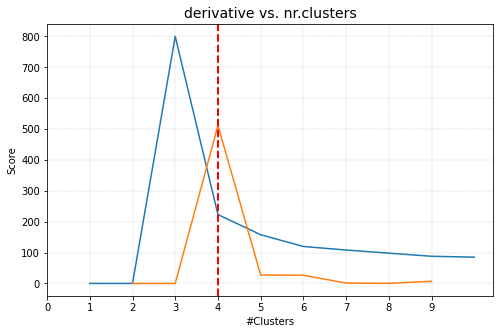

[clusteval] >Estimated number of n_clusters: 4, average silhouette_score=0.801


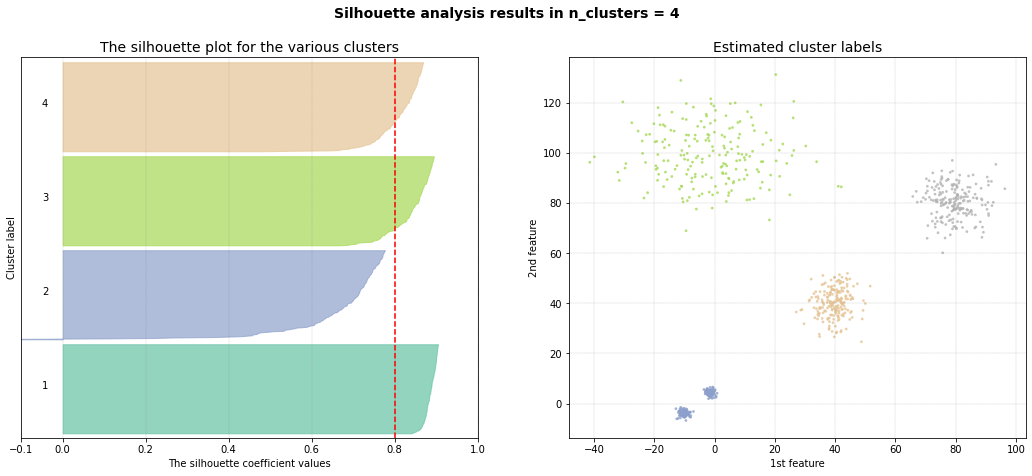

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7c4d6d90>)

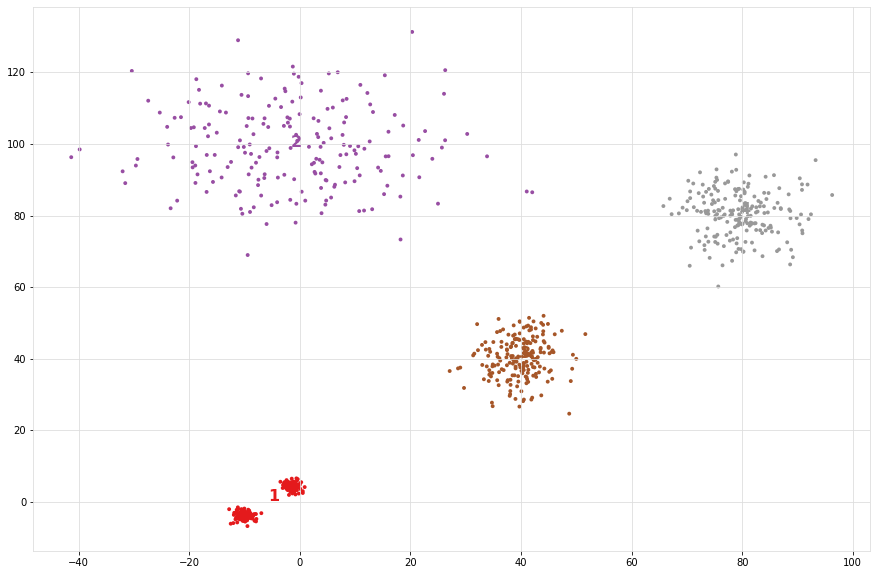

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(evaluate='derivative', linkage='ward', metric='euclidean')
# cl = clusteval(evaluate='silhouette', linkage='ward', metric='euclidean')
# cl = clusteval(evaluate='dbindex', linkage='ward', metric='euclidean', max_clust=10)

cl_results=cl.fit(X2)
cl.plot(figsize=(8,5))

# scatter plot
cl.scatter(X2)
scatterd(X2[:,0], X2[:,1], label=cl.results['labx'])


[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=511.782. Be patient now..
[clusteval] >Compute cluster labels.


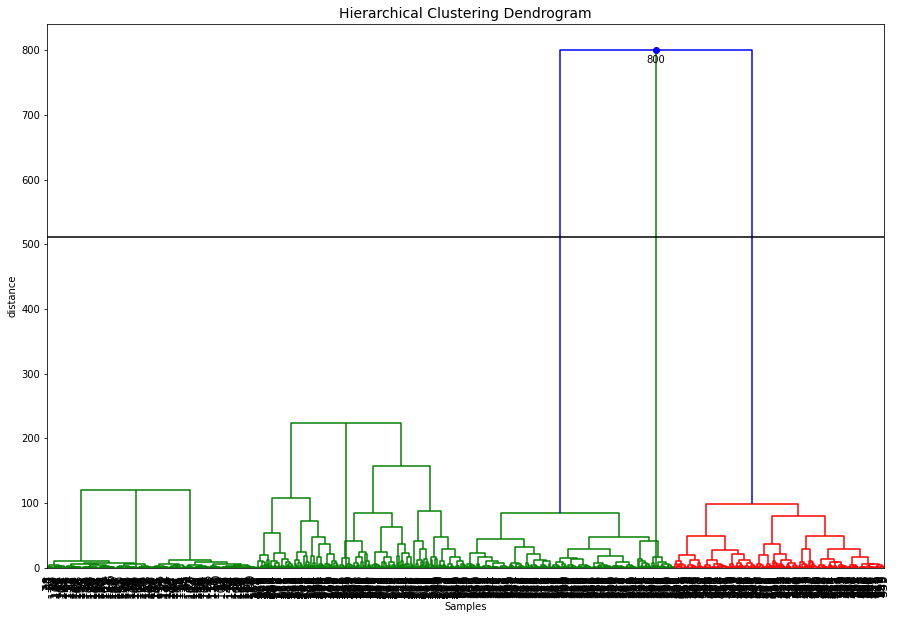

In [ ]:
cl.dendrogram();


#### Explore what exactly happens in the dendrogram when number of samples and variances differ across clusters:
Try to set depth at 60 and 80

### Horizontal cut in dendrogram
There is <b>NO</b> horizontal cut that gives the optimum number of clusters. How would you proceed now?

### DBSCAN

<br>1.The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. 
<br>2. Clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. 
<br>3. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. 
<br>4. A cluster is therefore a set of <b>core</b> samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 
<br>5. The DBSCAN algorithm is deterministic, always generating the same clusters when given the same data in the same order. 

<br>There are two parameters to the algorithm how <b>we</b> define <b>dense</b>
    * min_samples
    * eps
As an example, higher min_samples or lower eps indicate higher density necessary to form a cluster.
<br>The current implementation uses <i>ball trees</i> and <i>kd-trees</i> to determine the neighborhood of points, which avoids calculating the full distance matrix

In [ ]:
#!pip install hdbscan


[clusteval] >Fit using dbscan with metric: euclidean, and linkage: ward
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|██████████| 245/245 [00:32<00:00,  7.56it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


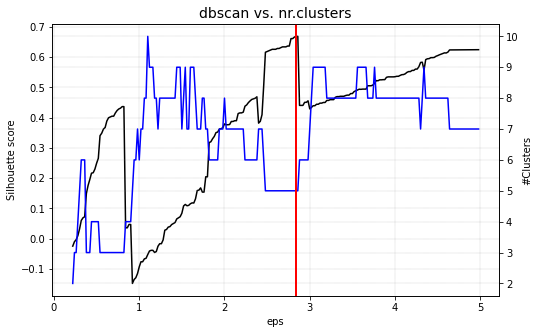

[clusteval] >Estimated number of n_clusters: 4, average silhouette_score=0.669


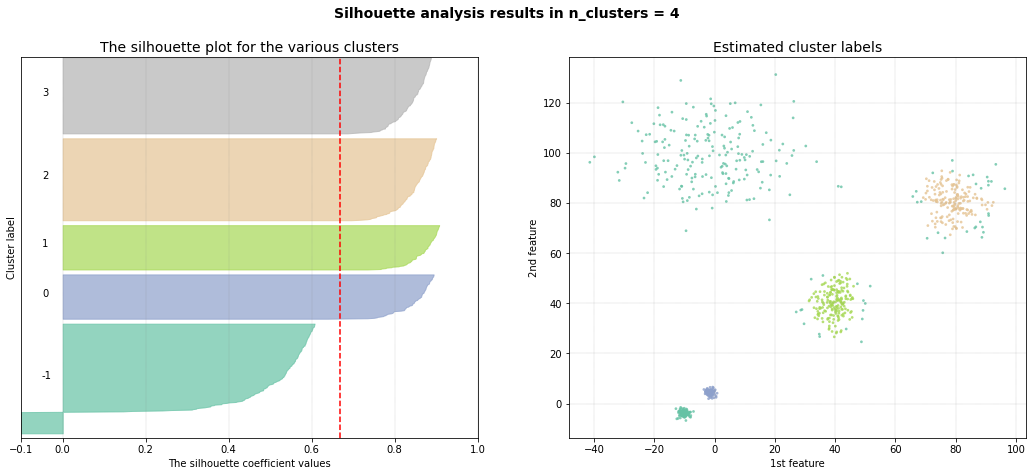

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e7ae20c50>)

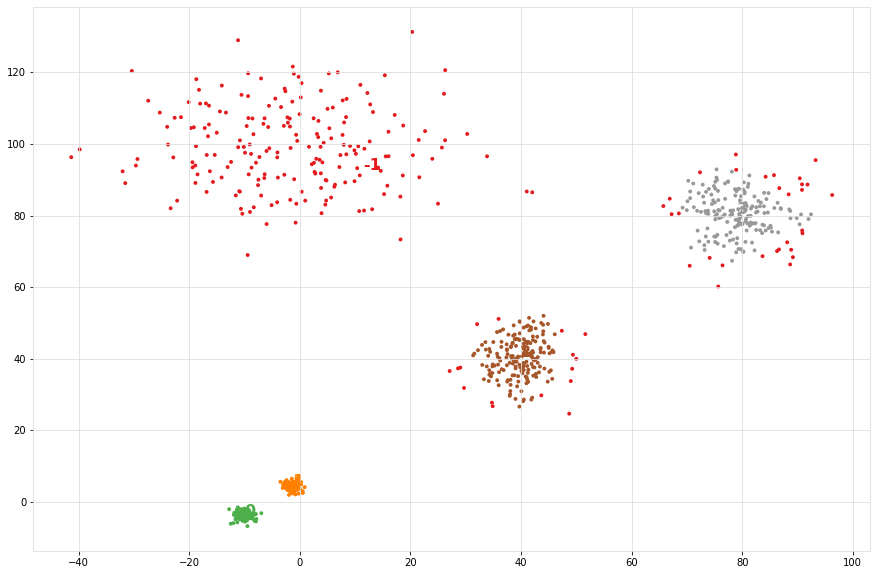

In [ ]:
# Cluster evaluation with silhouette score
# cl = clusteval(cluster='hdbscan', linkage='ward', metric='euclidean')
cl = clusteval(cluster='dbscan', linkage='ward', metric='euclidean')

cl_results=cl.fit(X2)
cl.plot(figsize=(8,5))

# scatter plot
cl.scatter(X2)
scatterd(X2[:,0], X2[:,1], label=cl.results['labx'])


In [ ]:
# Fin